# COVID-19 Risk Factors Analysis

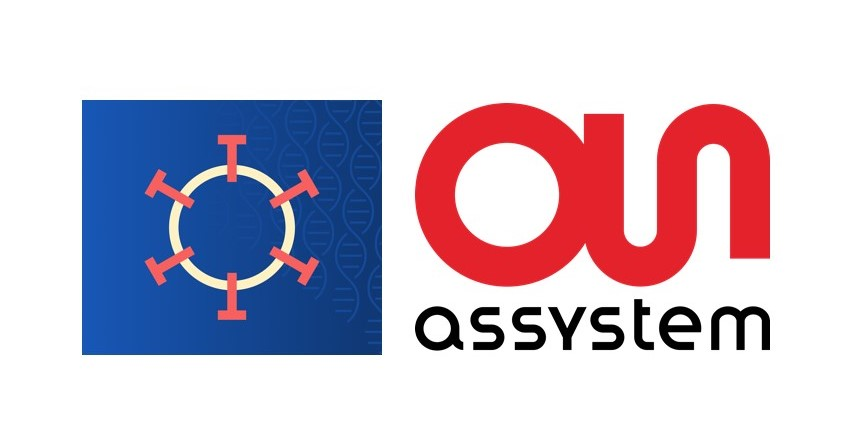



<a id="section-zero"></a>
# Contents
* [Contents](#section-zero)
* [1. Introduction](#section-one)
    * [1.1. About](#section-two)
    * [1.2. Contributors](#section-three)
    * [1.3. Task details](#section-four)
    * [1.4. Dataset description](#section-five)
* [2. Methodology](#section-six)
    * [2.1 Data Loading](#section-seven)
    * [2.2 Preprocessing](#section-eight)
    * [2.3 Topic Modelling](#section-nine)
    * [2.4 Search Engine](#section-ten)
    * [2.5 Graphs](#section-eleven)
* [3. Implementation](#section-twelve)
    * [3.1. Packages Import](#section-thirteen)
    * [3.2. Data Import](#section-fourteen)
    * [3.3. Data Preprocess](#section-fifteen)
    * [3.4. Data exploration with Topic Modelling](#section-sixteen)
    * [3.5. Search Engine](#section-seventeen)
    * [3.6. Graphs](#section-eighteen)
* [Citations](#section-nineteen)

<a id="section-one"></a>
# 1. Introduction
<a id="section-two"></a>
# 1.1 About
The goal of this notebook is to understand how risk factors could influence the flow of disease for COVID19 (or possibly trigger it) and thus help the research community in better understanding of COVID19. What WHO says about COVID and coronavirus ?

> **Coronaviruses** are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause **respiratory infections** ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease **COVID-19**. Source: WHO

> **COVID-19** is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019. Source: WHO

And what's about the risk factors ?
>The risk depends on where you  are - and more specifically, whether there is a COVID-19 outbreak unfolding there.
**For most people in most locations the risk of catching COVID-19 is still low.** However, there are now places around the world (cities or areas) where the disease is spreading. For people living in, or visiting, these areas the risk of catching COVID-19 is higher. Governments and health authorities are taking vigorous action every time a new case of COVID-19 is identified. Be sure to comply with any local restrictions on travel, movement or large gatherings. Cooperating with disease control efforts will reduce your risk of catching or spreading COVID-19.
COVID-19 outbreaks can be contained and transmission stopped, as has been shown in China and some other countries. Unfortunately, new outbreaks can emerge rapidly. It’s important to be aware of the situation where you are or intend to go. WHO publishes daily updates on the COVID-19 situation worldwide.

> **While we are still learning about how COVID-2019 affects people, older persons and persons with pre-existing medical conditions (such as high blood pressure, heart disease, lung disease, cancer or diabetes)  appear to develop serious illness more often than others.**

So, as we can see, we still don't know a lot about this coronavirus and we are learning something new each day. And it's here that our goal is placed - we should help the community to learn more about it. The number of literature speaking of COVID19 is increasing each day nowadays. With this increasing number, it gets more and more difficult for scientists to get valuable informations out of scientific papers within a short period of time. **By helping the scientific community, we are saving lives.** The scientists are exploring different aspects of the virus and they need a tool to give them a hand. We propose a simple, but yet robust and complete set of approaches (solutions) to resolve this issue. In this submission, we are showing:
1. How to properly centralize loading and preprocessing of large volumes of data by making use of developed methods and multiprocessing compute
2. How to explore large quantities of data using topic modelling for extracting relevant topics out of raw text, automate the search of these topics, their visualisation and interpretation
3. How to make use of word embeddings as a robust NLP techniques that will allow us to get similar words based on their distributions but also complex semantic relations between them.
4. How to use word emebeddings for Query expansion to power search engines.
5. How to build simple yet powerful search engines to get a list of relevant articles according to user's query.
6. How to concieve complex graph representations of data to search for strong and weak connections between them but also cluster them based on their importance.

**Our code is fully reproducible so don't hesitate to execute on your machine and experiment!** Plus, we are open for any feedback and suggestions that we will add to this kernel to make it live longer 😀
<a id="section-three"></a>
# 1.2 Contributors
### 1.2.1 Team members
All the team members are submitting under **Assystem**'s 🏢 company name.
The team members are:
* Ali KABBADJ (@alikabbadj)
* Kien DANG Trung (@luffy2106)
* Zakaria BOUHOUN (@zakaidev)
* Aleksei IANCHERUK (@alekseiiancheruk)

### 1.2.2 A brief Assystem group description
As an independent engineering group, Assystem has over 50 years of experience providing industrial infrastructures with engineering services and managing projects that are complex in size, technological content, and safety requirements. Assystem supports its clients in the design, construction supervision, commissioning and operation of their industrial infrastructures, ensuring that their facilities are safe and effective, in line with their budget and schedule.As a major player in digital transformation, Assystem also supports its clients in their **digital projects with digital engineering and industrial data science** solutions to meet their operational performance challenges. Assystem currently employ 5,700 people working in fourteen countries in Europe, the Middle East, and Asia.

<a id="section-four"></a>
# 1.3 Task details (taken from task definition)
What do we know about COVID-19 risk factors? What have we learned from epidemiological studies?
Specifically, we want to know what the literature reports about:
* Data on potential risks factors
    * Smoking, pre-existing pulmonary disease
    * Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities
    * Neonates and pregnant women
    * Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.
* Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors
* Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups
* Susceptibility of populations
* Public health mitigation measures that could be effective for control

<a id="section-five"></a>
# 1.4 Dataset Description (taken from challenge definition)
In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 44,000 scholarly articles, including over 29,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.

**We are using the V4 of this dataset (updated on 2020-03-20).**

<a id="section-six"></a>
# 2. Methodology
Our goal is not only to answer to the questions of the challenge about risk factors mentioned above but also to find some new possible risk factors and to link them to the existing ones. We normally distinguish different types of risk factors such as:
* **Behavioural: relate to actions that a person choose to take**
    * Smoking
    * Alcohol
    * Nutritional problems
    * Low activity
    * Unprotected sex
* **Physiological: relate to a person's body and are often influenced by genetics**
    * High blood pressure
    * High Blood sugar
* **Demographic: relate to all population**
    * Age
    * Gender
    * Income
    * Social group
    * Religion
* **Environmental: relate to physical settings**
    * Air pollution
    * Access to water
* **Genetic: diseases triggered by genes issues**
    * Cancer
    * Arthritis
    * Different types of chromosomal abnormalities
    
Let's see now what are the common risk factors across the world according to WHO (WHO, Numbers of the 10 leading global risks for mortality (death), 2004):
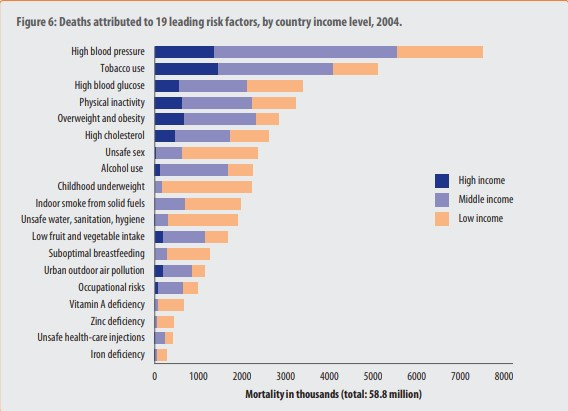


Our approach for discovering risk factors for COVID19 is represented below:


You will find more details below.

<a id="section-seven"></a>
# 2.1 Data Loading
We are using standard Python packages for reading metadata and parsing the articles files. The metadata file is used as a reference and after the extraction of raw articles we merge them with this metadata file. As the compute power (RAM specifically) of a build-in Kaggle notebook is not high, we are limiting ourselves to loading of only a subset of documents. to be specific, we load:
* Biorxiv
* Non-comm

Pros:
* Minimal dependancies
* Modular (to parse new field just add a new method and modify dataframe builder)

Some basic operations as drop of duplicated and fillna are also performed.

<a id="section-eight"></a>
# 2.2 Preprocessing
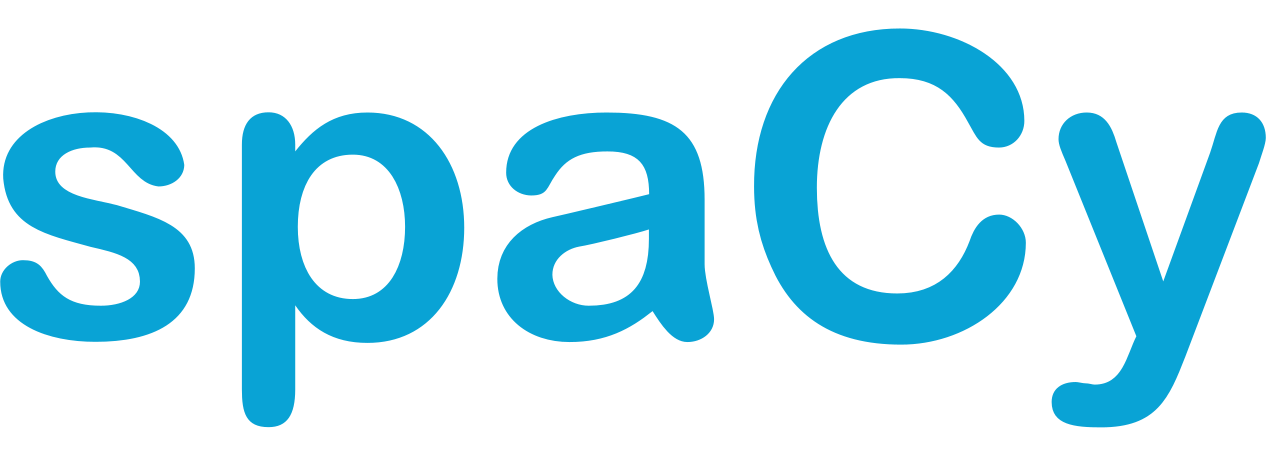
At this step we are defining a Preprocessor class that enables us to effectively preprocess any raw text. Before passing to preprocessing itself, we also detect language of the text. We are using parallel execution to speed up the process. The steps of preprocessing are:
1. Delete special characters
2. Tokenize
3. Lemmatize
4. Delete stopwords
5. Delete numbers tokens, tokens of url, emails, etc.
6. Filter too short tokens (optional)
7. Force ascii (optional)
8. Deaccent (optional)

Pros:
* Multilingual (6 languages supported)
* Adjustuble
Cons:
* Dependant on language data
* Takes a big amount of RAM to load all models
* Execution time (parallel executions helps here however)

<a id="section-nine"></a>
# 2.3 Topic Modelling
Topic Modelling will help us not to get a number of topics that are discussed in the documents. There are multiple methods of doing this but for this application we preferred to use **Latent Dirichlet Allocation (LDA)**.

LDA is an unsupervised machine-learning model that takes documents as input and gives topics as output.

Some pros of LDA approach:
* Unsupervised: no need of labelling data
* Fast: pretty fast to execute if well parametrized
* Easy to implement: bag of words are a standard in NLP so easy to implement, also multiple implementations already exist (we are using gensim)
* Easy prediction: once ready, it's easy to predict a topic for a new document

Common cons of LDA are pretty well known:
* Difficult to tune: the number of topics k is fixed and we should define it ourselves/pick it after multiple tryings, plus other parameters need a lot of handpicking
* Sometimes slow: with big-sized dictionnaires, model creation can take a long time
* Bag of words: the structure of the sentences is not captured, only word-level information
* Interpretation: the result of topic modelling is not 100% clear and needs to be interpreted by a human expert

We are using two variants of LDA: LDA BOW and LDA TFIDF. We are generating multiple LDA models with different number of topics as a main hyper-parameter to then choose the best model based on the coherence and perplexity scores. We are visualizing then T-SNE 2D plot with topics obtained as long as topic distribution. As a final one, we use our model to infer the questions about risk factors to get the documents also speaking of risk factors.

<a id="section-ten"></a>
# 2.4 Search Engine
In this part, we decided not to use modern language models despite their SOTA results in many benchmarks but stay somewhat in between classic search engines and semantic ones. Our apporoach is to perform a so-called Query expansion. Using this appoarch we are taking user's query and using a semantic model to add to it some similar words that might help in  the search.

We are using Glove as a semantic model. The advantage of it compared to Word2vec is that GloVe does not rely just on local statistics, but incorporates global statistics (word co-occurrence) to obtain word vectors. The expanded user query is then passed to a simple TFIDF-based search engine that computes query-to-document cosine similarity.

Some pros:
* Easy to build
* Not hungry on ressource as doesn't require a GPU
* Gives robust and stable results
* Approach often used in closed-domain industrial search engines

Some cons:
* No Question-Answering model for now (can be easily added)
* Glove embeddings should be trained on a large volume of data

<a id="section-eleven"></a>
# 2.5 Graphs
It could be interesting to simulate the relations between all the papers and for this we decided to also add a graph apporoach. We present the relationships of scientific papers by graphs. Each node in the graph presents one paper, one directed edge from one node to another node presents for a citation between 2 papers. 

In the reality, if one paper have high number of citations, it means that this paper is valuable in term of scientific contribution and thus attracts more scientists and has the most valuable information.

Also, a clustering could be performed on graphs. In graph theory or in the reality of science, when objects are in the same cluster, they tend to share the same interests, the orientation they want to follow, try to solve the big issues of science. Simply speaking, a cluster which has more papers than the others will represent the theme that many scientists want to discover.

There are 2 kinds of clustering :
1. Weak connected components (the citations in a cluster tend to branching or go to variaty rather than deeper). In this case, the scientists are interested in the same big theme but they still didn't dig into the same specific problem)
2. Strong connected components (the citations tend to go deeper and cyclic rather than go variety). Ex : Paper 1 -> paper 3 -> paper 6 -> paper 1. The papers in this kind of cluster have very strong relationship, and more importantly, the information in this papers is treasured (because the flow of knowledge come back to this paper again and again).

Pros:
* Advanced insights from the papers
* Papers clustering
* Detection of weak and strong connections

Cons:
* Graph generation and simulation takes a lot of time

<a id="section-twelve"></a>
# 3. Implementation

<a id="section-thirteen"></a>
# 3.1 Packages import

In [ ]:
!pip install pandarallel
!pip install langdetect
!pip install glove_python
!pip install pyjarowinkler

In [ ]:
# Basics
import gc
import re
import os
import json
import heapq
import pickle
import string
import random
import logging
import datetime
from tqdm import tqdm
from pathlib import Path
from copy import deepcopy
from unicodedata import normalize

# Multiprocessing, compute acceleration
import numba
from numba import prange
from pandarallel import pandarallel
from multiprocessing import Pool, cpu_count

# NLP
import nltk
import spacy
from langdetect import detect
from glove import Corpus, Glove
from gensim.utils import deaccent
# nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import CoherenceModel, TfidfModel
from gensim.models import LdaModel, LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from pyjarowinkler import distance

# Graphs
import networkx as nx

# Data Science
import umap
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Visuals
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
output_notebook()

In [ ]:
# Set figure size for matplotlib
plt.rcParams["figure.figsize"] = (10, 10)
pd.options.display.max_colwidth=160

In [ ]:
# Install language models
!python -m spacy download en
!python -m spacy download fr
!python -m spacy download es
!python -m spacy download it
!python -m spacy download de
!python -m spacy download pt

<a id="section-fourteen"></a>
# 3.2 Data import

### 3.2.1 Define Datahandler class

In [ ]:
class DataHandler(object):
    """
    Class that is used to load all the data from the CORD-19 dataset
    """
    def __init__(self, datapath):
        self.datapath = datapath

    def read_metadata(self, metadata_fileneme):
        """
        Read metadata csv
        """
        return pd.read_csv(self.datapath + metadata_fileneme)

    def read_papers(self, filelist):
        """
        Read json files from list of files
        """
        list_json_data = []

        for filename in filelist:
            file = json.load(open(filename, "rb"))
            list_json_data.append(file)

        return list_json_data

    def read_files_paths(self, folderpath, fileext=".json"):
        """
        Get paths to all the files inside a folder recursively. Set an extensions if needed
        """
        fls = [
            os.path.join(root, fn)
            for root, dirs, files in os.walk(Path(folderpath))
            for fn in files
            if Path(fn).suffix == fileext
        ]

        return fls

    def parse_authors(self, authors):
        """
        Parse authors field
        """
        authors_ls = []
        names_ls = []
        affiliations_ls = []
        emails_ls = []

        for author in authors:

            author_text = []

            # Parse name
            middle_name = " ".join(author["middle"])
            full_name = (
                " ".join([author["first"], middle_name, author["last"]])
                if author["middle"]
                else " ".join([author["first"], author["last"]])
            )
            author_text.append(full_name)
            names_ls.append(full_name)

            # Parse affiliation
            affiliation = author["affiliation"]
            if affiliation:
                affiliation_text = []
                laboratory = affiliation["laboratory"]
                institution = affiliation["institution"]
                location = affiliation["location"]
                if laboratory:
                    affiliation_text.append(laboratory)
                if institution:
                    affiliation_text.append(institution)
                if location:
                    affiliation_text.append(" ".join(list(location.values())))

                affiliation_text = ", ".join(affiliation_text)
                author_text.append(f"({affiliation_text})")
                affiliations_ls.append(affiliation_text)

            # Parse email
            email = author["email"]
            if email:
                author_text.append(f"[{email}]")
                emails_ls.append(email)

            # Concat info
            author_text = ", ".join(author_text)
            authors_ls.append(author_text)

        return {
            "authors_full": "; ".join(authors_ls),
            "names": "; ".join(names_ls),
            "emails": "; ".join(emails_ls),
            "affiliations": "; ".join(affiliations_ls),
        }

    def parse_abstract_body(self, body_text, raw_mode=False):
        """
        Parse abstract and body fields
        """
        entries_ls = []

        for entry in body_text:
            # Get section and its text
            text = entry["text"]
            section = entry["section"]

            if raw_mode != True:
                entries_ls.append(section)
                entries_ls.append(text)
            else:
                entries_ls.append({"text": text, "section": section})

        if raw_mode != True:
            return "\n\n".join(entries_ls)
        else:
            return entries_ls

    def parse_bib(self, bibs):
        """
        Parse bibliography field
        """
        if type(bibs) == dict:
            bibs = list(bibs.values())
        bibs = deepcopy(bibs)

        bibs_clean = []
        for bib in bibs:
            title = bib["title"]
            authors = bib["authors"]
            year = bib["year"]
            venue = bib["venue"]
            bibs_clean.append(f"{title} [{year}, {venue}]")

        return "; ".join(bibs_clean)

    def build_df(self, subfolder_papers, no_full_text=False):
        """
        Build a final Dataframe
        """
        list_json = self.read_files_paths(self.datapath + subfolder_papers)
        list_json_data = self.read_papers(list_json)

        raw_data = {
            "paper_id": [],
            "title": [],
            "authors": [],
            "authors_names": [],
            "authors_affiliations": [],
            "authors_emails": [],
            "abstract": [],
            "text": [],
            "bibliography": [],
            "raw_bibliography": [],
        }
        for file in tqdm(list_json_data):
            
            raw_data["paper_id"].append(file["paper_id"])
            raw_data["title"].append(file["metadata"]["title"])

            authors = self.parse_authors(file["metadata"]["authors"])
            raw_data["authors"].append(authors["authors_full"])
            raw_data["authors_names"].append(authors["names"])
            raw_data["authors_affiliations"].append(authors["affiliations"])
            raw_data["authors_emails"].append(authors["emails"])
            
            if "abstract" in file:
                raw_data["abstract"].append(self.parse_abstract_body(file["abstract"]))
            else:
                raw_data["abstract"].append("")
            if no_full_text == True:
                raw_data["text"].append("")
            else:
                raw_data["text"].append(self.parse_abstract_body(file["body_text"]))
            raw_data["bibliography"].append(self.parse_bib(file["bib_entries"]))
            raw_data["raw_bibliography"].append(file["bib_entries"])

        df_data = pd.DataFrame(raw_data)

        return df_data

### 3.2.2 Set paths to data and initiate DataHandler class

In [ ]:
data_path = '/kaggle/input/CORD-19-research-challenge/'
metadata_file_path = "metadata.csv"

In [ ]:
datahandler = DataHandler(data_path)

### 3.2.3 Import & process the data

Read metadata

In [ ]:
df_meta = datahandler.read_metadata(metadata_file_path)

Read Biorxiv Data

In [ ]:
df_biorxiv = datahandler.build_df('biorxiv_medrxiv')
df_biorxiv['subset'] = "biorxiv"

Read Comm Data (if needed)

In [ ]:
# df_comm = datahandler.build_df('comm_use_subset')
# df_comm['subset'] = "comm"

Read Noncomm Data

In [ ]:
df_noncomm = datahandler.build_df('noncomm_use_subset')
df_noncomm['subset'] = "noncomm"

Read Custom License Data (if needed)

In [ ]:
# df_custom = datahandler.build_df('custom_license')
# df_custom['subset'] = "custom_license"

### 3.2.4 Merge data (biorxiv and noncomm only)

In [ ]:
columns_to_keep = [
    "paper_id",
#     "source_x",
#     "journal",
#     "doi",
#     "pmcid",
#     "pubmed_id",
    "title_x",
    "authors_x",
#     "authors_names",
#     "authors_affiliations",
#     "authors_emails",
    "abstract_x",
    "publish_time",
    "text",
    "bibliography",
    "raw_bibliography",
#     "license",
#     "Microsoft Academic Paper ID",
#     "WHO #Covidence",
    "subset"
]

In [ ]:
# Declare the datasets you want to merge
datasets_to_read = [
    df_biorxiv,
    df_noncomm
]

In [ ]:
# Concat dfs generated from jsons, drop duplicates according to paper_id and abstract
df_all = pd.concat(datasets_to_read)
df_all = df_all.drop_duplicates(subset=['paper_id', 'abstract',]).reset_index(drop=True)

In [ ]:
# Merge raw data with metadata
df_merged = pd.merge(df_meta, df_all, left_on='sha', right_on='paper_id', how='inner')[columns_to_keep]
# Rename columns
df_merged = df_merged.rename(columns={'source_x': 'source', 'title_x': 'title', 'authors_x': 'authors', 'abstract_x': 'abstract',})
# Replace empty string fields with nans
df_merged = df_merged.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Drop duplicates again and reset index
df_merged.drop_duplicates(subset='abstract', inplace=True)
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
# Create column with all text data
df_merged['title_abstract_text'] = df_merged['title'].astype(str) + "\n\n" + df_merged['abstract'].astype(str) + "\n\n" + df_merged['text'].astype(str)

In [ ]:
# Check for nans
df_merged.loc[:, df_merged.isnull().any()].columns

In [ ]:
df_merged['authors'].fillna("", inplace=True)
df_merged['abstract'].fillna("", inplace=True)

In [ ]:
df_merged.shape

<a id="section-fifteen"></a>
# 3.3 Data Preprocess

### 3.3.1 Define Preprocessor class
The preprocessor class uses simple logics to preprocess raw text data. We are mainly using SpaCy for it with 6 most used languages. Here are some main steps implemented:
* language detection;
* special characters deletion;
* tokenization, lemmatization, stopwords deletion, filtering according to token lenght and some other;
* deaccent (optional);
* force ascii (optional, more strict than deaccent).

In [ ]:
class Preprocessor(object):
    """
    Class that is used to clean raw str
    """
    def __init__(self, force_deaccent, force_ascii, min_token_len, stop_list_custom, disabled_components, default_language):
        
        self.force_deaccent = force_deaccent
        self.force_ascii = force_ascii
        self.default_language = default_language
        self.min_token_len = min_token_len
        self.nlp_list = {
            "en": spacy.load("en", disable=disabled_components),
            "fr": spacy.load("fr", disable=disabled_components),
            "es": spacy.load("es", disable=disabled_components),
            "it": spacy.load("it", disable=disabled_components),
            "de": spacy.load("de", disable=disabled_components),
            "pt": spacy.load("pt", disable=disabled_components),
            }
        self.stop_list_all = self.init_stopwords(stop_list_custom)

    def init_stopwords(self, stop_list_custom):
        """
        Get list of stopwords from nltk, spacy and used custom list 
        """
        # Get nltk stopwords
        stop_list_nltk = list(set(stopwords.words('english'))) \
        + list(set(stopwords.words('french'))) \
        + list(set(stopwords.words('spanish'))) \
        + list(set(stopwords.words('italian'))) \
        + list(set(stopwords.words('german'))) \
        + list(set(stopwords.words('portuguese')))
        # Get spacy stopwords
        stop_list_spacy = list(spacy.lang.en.stop_words.STOP_WORDS) \
        + list(spacy.lang.fr.stop_words.STOP_WORDS) \
        + list(spacy.lang.es.stop_words.STOP_WORDS) \
        + list(spacy.lang.it.stop_words.STOP_WORDS) \
        + list(spacy.lang.de.stop_words.STOP_WORDS) \
        + list(spacy.lang.pt.stop_words.STOP_WORDS) \
        
        return stop_list_nltk+stop_list_spacy+stop_list_custom
    
    def detect_language(self, text):
        """
        Detect language with langdetect
        """
        try:
            lang = detect(text)
        except:
            lang = "unknown"
        return lang 

    def preprocess(self, text):
        """
        Main function to preprocess the text
        """
        lang = self.detect_language(text)
            
        if lang in ["en", "fr", "es", "it", "de", "pt"]:
            nlp = self.nlp_list[lang]
        else:
            nlp = self.nlp_list[self.default_language]
            
        # Delete some punctuation before preprocessing BUT not all of it because some can be involved in n-grams (e.g. "-")
        text=re.sub(r'[!"#$%&\'()*+,./:;<=>?@\[\\\]^_`{|}~]',r' ',text) 
        
        # Apply spacy to the text
        doc = nlp(text)
        # Lemmatization, remotion of noise (stopwords, digit, puntuaction and singol characters)
        tokens = [
            token.lemma_ for token in doc if
            token.lemma_ != '-PRON-'
            and not token.is_punct
            and not token.is_digit
            and not token.like_num
            and not token.like_url
            and not token.like_email
            and len(token.lemma_) >= self.min_token_len and len(token.text) >= self.min_token_len
            and token.lemma_.lower() not in self.stop_list_all and token.text.lower() not in self.stop_list_all
        ]
        
        # Recreation of the text
        text = " ".join(tokens)

        # Remove accents, normalize to ascii
        if self.force_ascii:
            text = normalize('NFD', text).encode('ascii', 'ignore').decode('UTF-8')
        
        if self.force_deaccent:
            text = deaccent(text)
    
        # Remove double spaces
        text=re.sub(r'\s+',r' ',text)
        
        # Set as lowercase
        text = text.lower().strip()

        return text

### 3.3.2 Initiate Preprocessor class and preprocess all the text 

In [ ]:
preprocessor = Preprocessor(
    force_ascii=False,
    force_deaccent=True,
    min_token_len=1,
    stop_list_custom=[
        'positives', 'true', 'false', 'tp', 'fp' 'cc_nc', 'q_q', 'r', 'b', 'p', 'q', 'h', 'cc', 'doi', 'medrxiv', 'fig', 'org', 'tb'
    ],
    disabled_components=['parser', 'ner'],
    default_language='en'
)

In [ ]:
pandarallel.initialize(nb_workers=cpu_count(), progress_bar=True)

In [ ]:
df_merged["title_abstract_text_preprocessed"] = df_merged.parallel_apply(
        lambda x: preprocessor.preprocess(x["title_abstract_text"]), axis=1
    )

<a id="section-sixteen"></a>
# 3.4 Data exploration with Topic Modelling

### 3.4.1 Generation of matrices and dictionary

Helper functions

In [ ]:
def find_num_topics(dictionary, corpus, docs, end, start=2, step=2):
    """
    Train multiple LDA models in an indicated range of number of topics  
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, end, step)):
        model = LdaModel(
            corpus=corpus,
            num_topics=num_topics,
            id2word=id2word,
            update_every=1,
            eval_every = 100,
            random_state=100,
            chunksize=2000,
            passes=4,
            iterations=100,
            per_word_topics=True,
        )

        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=docs, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
def plot_coherence_score(num_topic, coherence_score):
    """
    Plot coherence scores for LDA model
    """
    p = figure(plot_width=400, plot_height=400)

    # Add both a line and circles on the same plot
    p.line(num_topic, coherence_score, line_width=2)
    p.circle(num_topic, coherence_score, fill_color="white", size=8)
    p.xaxis.axis_label = "Number Of Topics"
    p.yaxis.axis_label = "Coherence Score"

    show(p)

In [ ]:
def visualize_topics(lda_model, corpus, id2word):
    """
    Generate a visual dashboard of LDA topics
    """
    pyLDAvis.enable_notebook()
    
    return pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [ ]:
def print_topics(lda_model):
    """
    Print topics made of keywords found in LDA model
    """
    columns_name = []
    pd_dict = {}

    num_topic = lda_model.num_topics
    for i in range(num_topic):
        columns_name.append(((f"Topic_{i+1}", "Word")))
        words, weight = zip(*lda_model.show_topic(i))
        pd_dict[f"topic{i+1}"] = list(words)

    df = pd.DataFrame(pd_dict)

    return df

-----------

In [ ]:
# Split to tokens
docs_tokens = [doc.split() for doc in list(df_merged.title_abstract_text_preprocessed)]

In [ ]:
# Infer bigram model
bigram_mod = Phraser(Phrases(docs_tokens, min_count=10, threshold=10))

In [ ]:
# Save model if needed
# bigram_mod.save('./data/bigram_mod')

In [ ]:
# Get bigrams
docs_bigram_tokens = [bigram_mod[doc] for doc in docs_tokens]

In [ ]:
# Create Dictionary
id2word = Dictionary(docs_bigram_tokens)
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
# Save model if needed
# id2word.save('./data/id2word')

In [ ]:
# Term Document Frequency
bow_corpus = [id2word.doc2bow(doc) for doc in docs_bigram_tokens]

In [ ]:
# TF-IDF Document Frequency
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

### 3.4.2 LDA with BOW

In [ ]:
start_topic, end_topic, step = 10, 18, 2

# Train LDA models
model_list, coherence_values = find_num_topics(
    dictionary=id2word,
    corpus=bow_corpus,
    docs=docs_bigram_tokens, 
    start=start_topic, 
    end=end_topic,
    step=step
    )

In [ ]:
plot_coherence_score(range(start_topic, end_topic, step), coherence_values)

Pick the model with the highest coherence score

In [ ]:
bow_lda_model = model_list[1]

In [ ]:
# Compute Perplexity
print('Perplexity: ', bow_lda_model.log_perplexity(bow_corpus))

pyLDAvis could help us to easily vizualize the topics. We include a non-interactive version here. If needed an interactive version, please execute the cell below the plot.

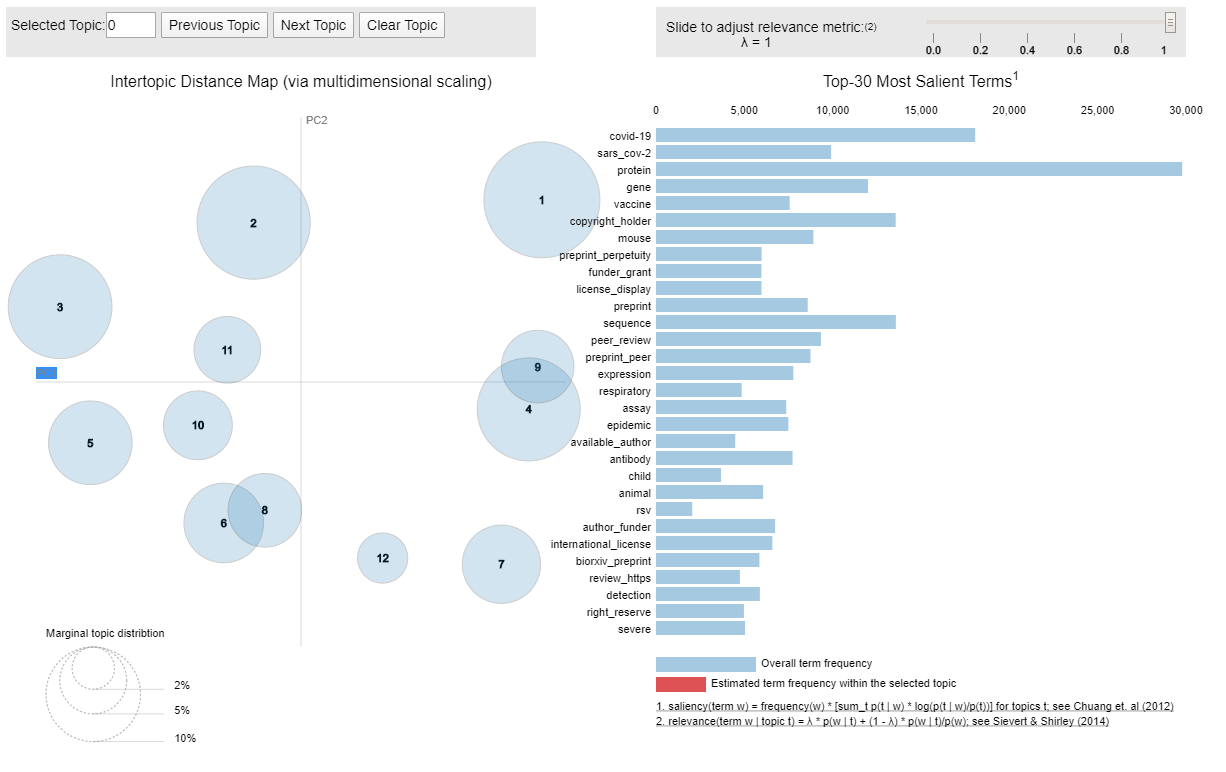

In [ ]:
# visualize_topics(bow_lda_model, bow_corpus, id2word)

In [ ]:
print_topics(bow_lda_model)

In [ ]:
# Save model if needed
# bow_lda_model.save('bow_lda_model')

### 3.4.3 LDA using TF-IDF

In [ ]:
start_topic, end_topic, step = 10, 18, 2

tfidf_model_list, tfidf_coherence_values = find_num_topics(
    dictionary=id2word,
    corpus=tfidf_corpus,
    docs=docs_bigram_tokens,
    start=start_topic,
    end=end_topic,
    step=step
    )

In [ ]:
plot_coherence_score(range(start_topic, end_topic, step), tfidf_coherence_values)

In [ ]:
tfidf_lda_model = tfidf_model_list[0]

In [ ]:
# Compute Perplexity
print('Perplexity: ', tfidf_lda_model.log_perplexity(tfidf_corpus))  

pyLDAvis could help us to easily vizualize the topics. We include a non-interactive version here. If needed an interactive version, please execute the cell below the plot.

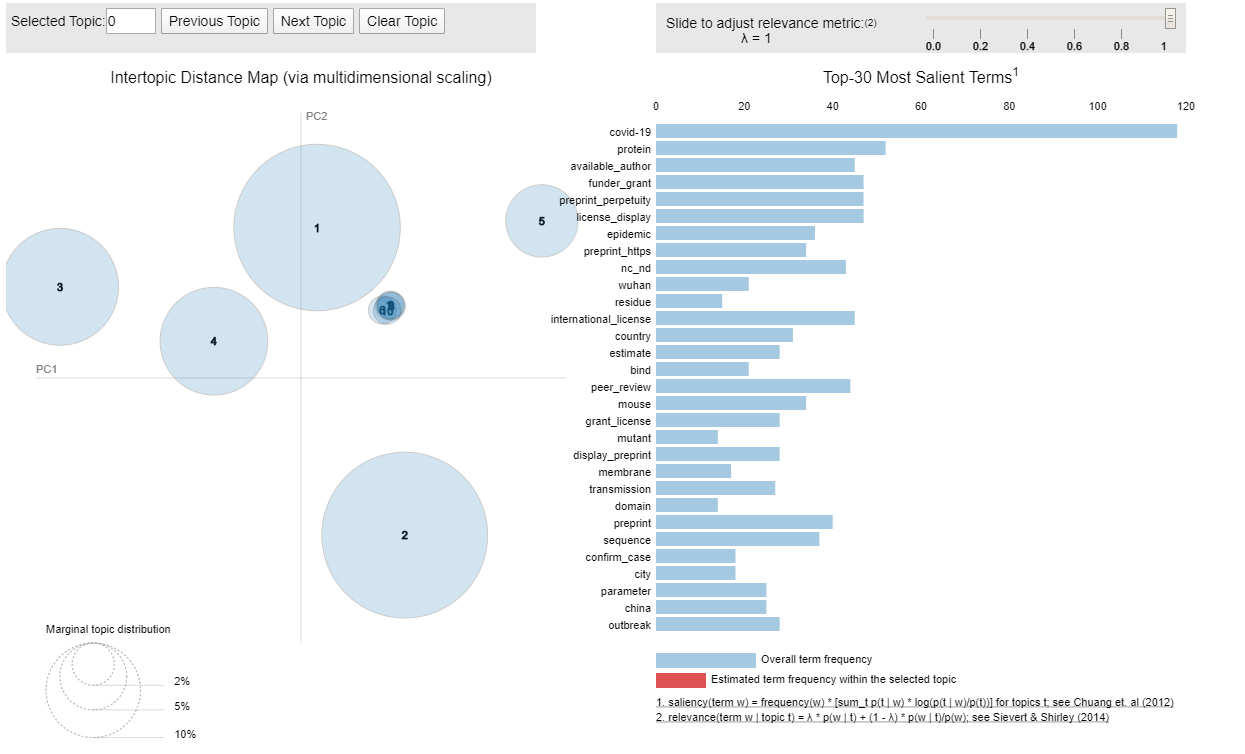

In [ ]:
# visualize_topics(tfidf_lda_model, tfidf_corpus, id2word)

In [ ]:
print_topics(tfidf_lda_model).style.background_gradient(cmap='viridis')

In [ ]:
# Save model if needed
# tfidf_lda_model.save('tfidf_lda_model')

Choose best model

In [ ]:
lda_model = bow_lda_model

### 3.4.4 Get topics for all documents

Helper functions

In [ ]:
def topic_all_documents(lda_model, corpus, texts):
    """
    Obtain topics for all the documents
    """
    # Init output
    documents_topic_df = pd.DataFrame()
    columns_name = ["Document", "Dominant Topic", "Topic Score", "Word List"]
    columns_name.extend([f"Topic_{i+1}" for i in range(lda_model.num_topics)])
    columns_name.append("Text")

    words_topic = []
    for i in range(lda_model.num_topics):
        x, _ = zip(*lda_model.show_topic(i))
        words_topic.append(list(x))

    for document_indx, topic_score in enumerate(lda_model.get_document_topics(corpus)):
        dominant_topic = sorted(topic_score, key=lambda x: x[1], reverse=True)[0]

        row_score = np.zeros(lda_model.num_topics)
        index, score = zip(*topic_score)
        row_score[list(index)] = score
        row_score = np.around(row_score, 4)

        documents_topic_df = documents_topic_df.append(
            pd.concat(
                [
                    pd.Series(
                        [
                            int(document_indx),
                            dominant_topic[0] + 1,
                            round(dominant_topic[1], 4),
                            words_topic[dominant_topic[0]],
                        ]
                    ),
                    pd.Series(row_score),
                ],
                ignore_index=True,
            ),
            ignore_index=True,
        )

    # Add original text to the end of the output
    contents = pd.Series(texts)
    documents_topic_df = pd.concat([documents_topic_df, contents], axis=1)

    documents_topic_df.columns = columns_name
    documents_topic_df["Dominant Topic"] = pd.to_numeric(
        documents_topic_df["Dominant Topic"]
    )
    documents_topic_df["Document"] = pd.to_numeric(documents_topic_df["Document"])

    return documents_topic_df

-----------

In [ ]:
%%time
documents_topic_df = topic_all_documents(
    lda_model=lda_model, corpus=bow_corpus, texts=docs_bigram_tokens
)

In [ ]:
documents_topic_df.head(5)

### 3.4.5 The most representative document for each topic

In [ ]:
most_representative_df = pd.DataFrame()
domiant_topic_df = documents_topic_df.groupby("Dominant Topic")

for i, grp in domiant_topic_df:
    most_representative_df = pd.concat(
        [
            most_representative_df,
            grp.sort_values(["Topic Score"], ascending=False).head(1),
        ],
        axis=0,
    )

most_representative_df.reset_index(drop=True, inplace=True)

most_representative_df = most_representative_df.iloc[:, 0:4]

most_representative_df.columns = [
    "Document",
    "Topic_Num",
    "Best Topic Score",
    "Word List",
]

In [ ]:
most_representative_df.style.background_gradient(cmap='viridis')

### 3.4.6 Topic Distribution

Helper functions

In [ ]:
def topic_distribution(lda_model, documents_topic_df):
    """
    
    """
    topic_avg = documents_topic_df.groupby(['Dominant Topic'])["Topic Score"].mean()
    topic_count = documents_topic_df.groupby(['Dominant Topic'])['Document'].count()

    topic_df = pd.DataFrame()
    topic_df['Average'] = topic_avg
    topic_df['Count'] = topic_count
    topic_df = topic_df.reset_index()
    
    topic_df = topic_df.fillna(0)

    topic_df.plot.bar(x='Dominant Topic', y='Count', rot=0)

    return topic_df

------------

In [ ]:
topic_distibution_res = topic_distribution(lda_model, documents_topic_df)

In [ ]:
topic_distibution_res.style.background_gradient(cmap='viridis')

### 3.4.7 Word Clouds of Top Keywords

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### 3.4.8 T-SNE plot of document clusters

In [ ]:
def plot_tsne(lda_model):    
    """
    Plot Documents Clusters based on topics scors
    """
    topic_score = documents_topic_df.iloc[:,4: 4 + lda_model.num_topics]
    
    topic_num = np.array(documents_topic_df.iloc[:,1]).astype(int)

    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(topic_score)

    # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = lda_model.num_topics
    mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])
    
    plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
                  plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num + 5])
    show(plot)

As we can see, even on this subset of data, the topics are well distinguished:

In [ ]:
plot_tsne(lda_model)

### 3.4.9 Prediction on unseen documents

Helper functions

In [ ]:
def prediction_unseen_doc(lda_model, doc, threshold=0.1):
    """
    Get the most representative topic of a new documment
    """
    doc_preprocessed = doc.split()
    doc_tokens = bigram_mod[doc_preprocessed]
    bow_tokens = id2word.doc2bow(doc_tokens)

    rows = []
    for i, score in sorted(
        lda_model.get_document_topics(bow_tokens), key=lambda x: x[1], reverse=True
    ):
        if score > threshold:
            words, _ = zip(*lda_model.show_topic(i))
            rows.append([f"Topic_{i+1}", score, "; ".join(words)])
            break

    return pd.DataFrame(rows, columns=["Topic", "Score", "Words"])

In [ ]:
def document_same_topic(df_topic, documents_topic_df, df_merged):
    """
    Obtain documents that have the same topic as df_topic
    """

    for index, row in df_topic.iterrows():
        topic = int(row["Topic"].split("_")[-1])

        doc_same_topic = list(
            documents_topic_df[documents_topic_df["Dominant Topic"] == topic][
                "Document"
            ]
        )

        doc_detail = df_merged.loc[doc_same_topic]

    return doc_detail

--------------

When we'll have a new article coming up, we'll be able to detect its topic automatically. This could allow us to filter out the articles that don't speak of COVID19 risk factors or the opposite, get a list of articles that also speak about a specific one or all risk factors.

Now let's define our queries about risk factors and preprocess them. They will be used in the Search engine as well.

In [ ]:
# Define the queries
QUERY1 = '''
Data on potential risks factors
Smoking, pre-existing pulmonary disease
Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities
Neonates and pregnant women
Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.
'''
QUERY2 = '''
Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors
'''
QUERY3 = '''
Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups
'''
QUERY4 = '''
Susceptibility of populations
'''
QUERY5 = '''
Public health mitigation measures that could be effective for control
'''

In [ ]:
# Preprocess the queries
query_1_preprocessed = preprocessor.preprocess(QUERY1)
query_2_preprocessed = preprocessor.preprocess(QUERY2)
query_3_preprocessed = preprocessor.preprocess(QUERY3)
query_4_preprocessed = preprocessor.preprocess(QUERY4)
query_5_preprocessed = preprocessor.preprocess(QUERY5)

Now let's find a topic for each query and show documents that share the same topic

* Data on potential risks factors
    * Smoking, pre-existing pulmonary disease
    * Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities
    * Neonates and pregnant women
    * Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.

In [ ]:
unseen_doc_q1 = prediction_unseen_doc(lda_model=lda_model,doc=query_1_preprocessed)
unseen_doc_same_topic_q1 = document_same_topic(unseen_doc_q1, documents_topic_df, df_merged).head(10)

In [ ]:
unseen_doc_q1.style.background_gradient(cmap='viridis')

In [ ]:
unseen_doc_same_topic_q1.head()

* Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors

In [ ]:
unseen_doc_q2 = prediction_unseen_doc(lda_model=lda_model,doc=query_2_preprocessed)
unseen_doc_same_topic_q2 = document_same_topic(unseen_doc_q2, documents_topic_df, df_merged).head(10)

In [ ]:
unseen_doc_q2.style.background_gradient(cmap='viridis')

In [ ]:
unseen_doc_same_topic_q2.head()

* Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups

In [ ]:
unseen_doc_q3 = prediction_unseen_doc(lda_model=lda_model,doc=query_3_preprocessed)
unseen_doc_same_topic_q3 = document_same_topic(unseen_doc_q3, documents_topic_df, df_merged).head(10)

In [ ]:
unseen_doc_q3.style.background_gradient(cmap='viridis')

In [ ]:
unseen_doc_same_topic_q3.head()

* Susceptibility of populations

In [ ]:
unseen_doc_q4 = prediction_unseen_doc(lda_model=lda_model,doc=query_4_preprocessed)
unseen_doc_same_topic_q4 = document_same_topic(unseen_doc_q4, documents_topic_df, df_merged).head(10)

In [ ]:
unseen_doc_q4.style.background_gradient(cmap='viridis')

In [ ]:
unseen_doc_same_topic_q4.head()

* Public health mitigation measures that could be effective for control

In [ ]:
unseen_doc_q5 = prediction_unseen_doc(lda_model=lda_model,doc=query_5_preprocessed)
unseen_doc_same_topic_q5 = document_same_topic(unseen_doc_q5, documents_topic_df, df_merged).head(10)

In [ ]:
unseen_doc_q5.style.background_gradient(cmap='viridis')

In [ ]:
unseen_doc_same_topic_q5.head()

<a id="section-seventeen"></a>
# 3.5 Search Engine

### 3.5.1 Train a Glove model

Train your Glove model if needed

In [ ]:
GLOVE_TRAIN_MODE = False

In [ ]:
# Create a Glove object which will use the corpus matrix created above lines to create embeddings
glove = Glove(no_components=300, learning_rate=0.05)
if GLOVE_TRAIN_MODE:
    # Creating a corpus object
    corpus = Corpus()

    # Fit the corpus with a list of tokens
    corpus.fit(docs_tokens, window=10)

    # Fit glove embeddings and add dict to it
    glove.fit(corpus.matrix, epochs=30, no_threads=30, verbose=True)
    glove.add_dictionary(corpus.dictionary)
    
    # Save obtained model
    glove.save('opencovid_glove_300d.model')

### 3.5.2 Get words embeddings

Helper fuctions

In [ ]:
def most_similar(v, *ignore, n=1):
    """
    Get most similar words using words embeddings and Glove vector matrix 
    """
    similar = []
    for word, u in vectors.items():
        if word in ignore:
            continue
        similarity = u.dot(v)
        if len(similar) < n:
            heapq.heappush(similar, (similarity, word))
        else:
            heapq.heappushpop(similar, (similarity, word))

    return sorted(similar, reverse=True)

In [ ]:
def plot_wordsl(words, lines=False):
    """
    Plot simple words relations with Glove embeddings
    """
    BW = "\x1b[1;30;45m"
    EEND = "\x1b[0m"

    wwl = []
    for ww in words:
        if ww in vectors:
            wwl.append(ww)
        else:
            print(
                BW,
                "*** WARNING ***** the word ",
                ww,
                "is not in the embedding vectors",
                EEND,
            )

    words = wwl
    pca = PCA(n_components=2)
    xys = pca.fit_transform([vectors[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i : i + 2, 0], xys[i : i + 2, 1])
    else:
        plt.scatter(*xys.T)

    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=15)

    return pca

--------------

In [ ]:
# If load from saved copy
glove = Glove.load('/kaggle/input/assystem-opencovid19-helpers/opencovid_glove_300d.model')

In [ ]:
# Check embeddings dimensions
len(glove.word_vectors[glove.dictionary['virus']])

In [ ]:
# Check number of words contained in dict
len(glove.dictionary)

In [ ]:
# Put in a dictionary to easily get embeddings
vectors = {word: glove.word_vectors[glove.dictionary[word]] for word in glove.dictionary.keys()}
len(vectors)

In [ ]:
print(vectors['virus'])

Our trained Glove model allow us to get words similar semantically to our query

In [ ]:
# Test it 1!
xxll = most_similar(vectors['covid19'], n=10)
near_w = [x[1] for x in xxll]
near_w

In [ ]:
# Test it 2!
xxll = most_similar(vectors['pneumonia'], n=10)
near_w = [x[1] for x in xxll]
near_w

Let's try to plot words relations from Glove. If we have names of risk factors, Glove could helps us to identify words (new risk factors, related diseases) that ofter co-occur or have the same meening but were lost in a big quantity of papers. 

In [ ]:
plt.title('Words relations using Glove', fontsize=20)
plot_wordsl(['pneumonia',
 'severe',
 'respiratory',
 'bacterial',
 'patient',
 'acute',
 'child',
 'bronchiolitis',
 'interstitial',
 'cause'], lines=True)

### 3.5.3 Search Engine TfIDF

Helper functions

In [ ]:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_cosine(u, v):
    """
    Compute cosine distance between two matrices
    """
    m = u.shape[0]
    udotv = 0
    u_norm = 0
    v_norm = 0
    for i in range(m):
        if (np.isnan(u[i])) or (np.isnan(v[i])):
            continue

        udotv += u[i] * v[i]
        u_norm += u[i] * u[i]
        v_norm += v[i] * v[i]

    u_norm = np.sqrt(u_norm)
    v_norm = np.sqrt(v_norm)

    if (u_norm == 0) or (v_norm == 0):
        ratio = 0.0
    else:
        ratio = udotv / (u_norm * v_norm)
    return ratio

In [ ]:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_get_keyWordsMatching_compute(Xtf1, Xtf2):
    """
    Compute multiplication element by element of vectors and return index of non negative value after multiplication
    """
    pointwiseMultiplication = np.multiply(Xtf1, Xtf2)
    index = pointwiseMultiplication.nonzero()[1]

    return pointwiseMultiplication, index

In [ ]:
def fast_get_keyWordsMatching(Xtf1, Xtf2, tf):
    """
    Retrieve keywords responsible of the matching score
    """
    pointwiseMultiplication, index = fast_get_keyWordsMatching_compute(
        Xtf1.toarray(), Xtf2.toarray()
    )
    cross = []
    for i in index:
        # take the word from the dictionary that corrisponds to the index
        key = list(tf.vocabulary_.keys())[list(tf.vocabulary_.values()).index(i)]
        # take the value of the multiplication
        value = pointwiseMultiplication[0, i]
        cross.append((key, value))

    return sorted(cross, key=lambda x: -x[1])  # sort output

In [ ]:
def get_matching(df_merged, xtfidf_papers, xtfidf_query):
    """
    Compute scores for documents
    """
    score_overall_papers = []
    keywords_papers = []
    for i in prange(df_merged.shape[0]):
        score_overall_papers.append(
            fast_cosine(xtfidf_papers[i].toarray()[0], xtfidf_query.toarray()[0])
        )
        keywords_papers.append(
            fast_get_keyWordsMatching(xtfidf_papers[i], xtfidf_query, tfidf)
        )

    return score_overall_papers, keywords_papers

-----------

In [ ]:
# Query expansion 1 with Glove
query_1_expanded_l = []
for ww in query_1_preprocessed.split():
    if ww not in ['neonates']:
        xxll = most_similar(vectors[ww], n=3)
        near_w = [x[1] for x in xxll]
        query_1_expanded_l += near_w
query_1_expanded = " ".join(query_1_expanded_l)

In [ ]:
query_1_preprocessed, query_1_expanded

In [ ]:
# Query expansion 2 with Glove
query_2_expanded_l = []
for ww in query_2_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_2_expanded_l += near_w
query_2_expanded = " ".join(query_2_expanded_l)

In [ ]:
query_2_preprocessed, query_2_expanded

In [ ]:
# Query expansion 3 with Glove
query_3_expanded_l = []
for ww in query_3_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_3_expanded_l += near_w
query_3_expanded = " ".join(query_3_expanded_l)

In [ ]:
query_3_preprocessed, query_3_expanded

In [ ]:
# Query expansion 4 with Glove
query_4_expanded_l = []
for ww in query_4_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_4_expanded_l += near_w
query_4_expanded = " ".join(query_4_expanded_l)

In [ ]:
query_4_preprocessed, query_4_expanded

In [ ]:
# Query expansion 5 with Glove
query_5_expanded_l = []
for ww in query_5_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_5_expanded_l += near_w
query_5_expanded = " ".join(query_5_expanded_l)

In [ ]:
query_5_preprocessed, query_5_expanded

In [ ]:
# Initialize TfIdfVectorizer object
tfidf = TfidfVectorizer(
        ngram_range=(1, 1)
)

In [ ]:
# Fit TfIdf model
tfidf.fit(df_merged["title_abstract_text_preprocessed"])

In [ ]:
# Get sparse matrices for papers 
xtfidf_papers = tfidf.transform(df_merged["title_abstract_text_preprocessed"])

In [ ]:
# Get sparse matrices for queries
xtfidf_query_1 = tfidf.transform([query_1_expanded])
xtfidf_query_2 = tfidf.transform([query_2_expanded])
xtfidf_query_3 = tfidf.transform([query_3_expanded])
xtfidf_query_4 = tfidf.transform([query_4_expanded])
xtfidf_query_5 = tfidf.transform([query_5_expanded])

In [ ]:
# Get matching scores and keywords that matched for queries
scores_1, keywords_1 = get_matching(df_merged, xtfidf_papers, xtfidf_query_1)
scores_2, keywords_2 = get_matching(df_merged, xtfidf_papers, xtfidf_query_2)
scores_3, keywords_3 = get_matching(df_merged, xtfidf_papers, xtfidf_query_3)
scores_4, keywords_4 = get_matching(df_merged, xtfidf_papers, xtfidf_query_4)
scores_5, keywords_5 = get_matching(df_merged, xtfidf_papers, xtfidf_query_5)

In [ ]:
df_merged_q1 = df_merged[['paper_id', 'title']].copy()
df_merged_q2 = df_merged[['paper_id', 'title']].copy()
df_merged_q3 = df_merged[['paper_id', 'title']].copy()
df_merged_q4 = df_merged[['paper_id', 'title']].copy()
df_merged_q5 = df_merged[['paper_id', 'title']].copy()

In [ ]:
df_merged_q1['score'] = scores_1
df_merged_q2['score'] = scores_2
df_merged_q3['score'] = scores_3
df_merged_q4['score'] = scores_4
df_merged_q5['score'] = scores_5
df_merged_q1['keywords'] = [[x[0] for x in r][:2] for r in keywords_1]
df_merged_q2['keywords'] = [[x[0] for x in r][:2] for r in keywords_2]
df_merged_q3['keywords'] = [[x[0] for x in r][:2] for r in keywords_3]
df_merged_q4['keywords'] = [[x[0] for x in r][:2] for r in keywords_4]
df_merged_q5['keywords'] = [[x[0] for x in r][:2] for r in keywords_5]

In [ ]:
df_merged_q1 = df_merged_q1.sort_values(by='score', ascending=False).reset_index(drop=True)
df_merged_q2 = df_merged_q2.sort_values(by='score', ascending=False).reset_index(drop=True)
df_merged_q3 = df_merged_q3.sort_values(by='score', ascending=False).reset_index(drop=True)
df_merged_q4 = df_merged_q4.sort_values(by='score', ascending=False).reset_index(drop=True)
df_merged_q5 = df_merged_q5.sort_values(by='score', ascending=False).reset_index(drop=True)

In [ ]:
# Cut too long title for pretty printing
df_merged_q1['title'] = df_merged_q1['title'].apply(lambda x: " ".join(x.split()[:10])+"...")
df_merged_q2['title'] = df_merged_q2['title'].apply(lambda x: " ".join(x.split()[:10])+"...")
df_merged_q3['title'] = df_merged_q3['title'].apply(lambda x: " ".join(x.split()[:10])+"...")
df_merged_q4['title'] = df_merged_q4['title'].apply(lambda x: " ".join(x.split()[:10])+"...")
df_merged_q5['title'] = df_merged_q5['title'].apply(lambda x: " ".join(x.split()[:10])+"...")

Let's visualize the results !

* Data on potential risks factors
    * Smoking, pre-existing pulmonary disease
    * Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities
    * Neonates and pregnant women
    * Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.

In [ ]:
df_merged_q1.head(10).style.background_gradient(cmap='viridis')

* Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors

In [ ]:
df_merged_q2.head(10).style.background_gradient(cmap='viridis')

* Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups

In [ ]:
df_merged_q3.head(10).style.background_gradient(cmap='viridis')

* Susceptibility of populations

In [ ]:
df_merged_q4.head(10).style.background_gradient(cmap='viridis')

* Public health mitigation measures that could be effective for control

In [ ]:
df_merged_q5.head(10).style.background_gradient(cmap='viridis')

And let's try to search for **a possible new risk factor**

In [ ]:
QUERY_NEW = "Air pollution, arthritis"
query_new_preprocessed = preprocessor.preprocess(QUERY_NEW)

In [ ]:
# Query expansion 4 with Glove
query_new_expanded_l = []
for ww in query_new_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_new_expanded_l += near_w
query_new_expanded = " ".join(query_new_expanded_l)

In [ ]:
query_new_preprocessed, query_new_expanded

In [ ]:
xtfidf_query_new = tfidf.transform([query_new_expanded])

In [ ]:
scores_new, keywords_new = get_matching(df_merged, xtfidf_papers, xtfidf_query_new)

In [ ]:
df_merged_qnew = df_merged[['paper_id', 'title']].copy()
df_merged_qnew['score'] = scores_new
df_merged_qnew['keywords'] = [[x[0] for x in r][:2] for r in keywords_new]

In [ ]:
df_merged_qnew = df_merged_qnew.sort_values(by='score', ascending=False).reset_index(drop=True)
df_merged_qnew['title'] = df_merged_qnew['title'].apply(lambda x: " ".join(x.split()[:10])+"...")

In [ ]:
df_merged_qnew.head(10).style.background_gradient(cmap='viridis')

<a id="section-eighteen"></a>
# 3.6 Graphs

### 3.6.1 Data Preparation

Helper functions

In [ ]:
def check_cite(df, dict_merged_title_bib, citations):
    """
    Generate graph nodes and edges
    """
    cite_frame = set()
    for cite in df['bibliography']:
        for dict_paper in dict_merged_title_bib:
            processed_title = dict_paper['title']
            if cite and processed_title:
                try:
                    if distance.get_jaro_distance(processed_title, cite, winkler=True, scaling=0.1) > 0.88:
                        citations.add((df['paper_id'],dict_paper['paper_id']))
                        cite_frame.add((df['paper_id'],dict_paper['paper_id']))
                except:
                    break
    return cite_frame

In [ ]:
def clean_for_graphs(text):
    """
    Light prepossessing steps that are used to preprocess text for graph generation
    """
    # convert string to upper case
    text = text.lower()
    # prepare regex for char filtering
    re_print = re.compile("[^%s]" % re.escape(string.printable))
    # prepare translation table for removing punctuation
    table = str.maketrans("", "", string.punctuation)
    # normalize unicode characters
    text = normalize("NFD", text).encode("ascii", "ignore")
    text = text.decode("UTF-8")
    # tokenize on white space
    words = text.split()
    # remove punctuation from each token
    words = [w.translate(table) for w in words]
    # remove non-printable chars form each token
    words = [re_print.sub("", w) for w in words]
    new_text = " ".join(words)

    return new_text

------------------

Create citations nodes and edges. Takes a lot of time as high O complexity. Define a number of paper you want to simulates or just import a set of already generated links from Assystem-OpenCovid19-Helpers in section 3.6.2.

Generate nodes and edges

In [ ]:
GRAPH_TRAIN_MODE = False

In [ ]:
df_merged_title_bib =  df_merged[['paper_id','title','bibliography']].copy()
if GRAPH_TRAIN_MODE:

    pandarallel.initialize(nb_workers=cpu_count()-1, progress_bar=True)
    
    df_merged_title_bib['bibliography'] = df_merged_title_bib['bibliography'].apply(lambda x: x.split(';'))
    
    dict_merged_title_bib = df_merged_title_bib.to_dict('records')
    df_merged_title_bib['title'] = df_merged_title_bib['title'].apply(clean_for_graphs)
    df_merged_title_bib['bibliography'] = df_merged_title_bib['bibliography'].apply(lambda x: [clean_for_graphs(cite) for cite in x])
    citations = set()
    df_merged_title_bib['cite'] = df_merged_title_bib.parallel_apply(check_cite, args=(dict_merged_title_bib, citations), axis=1)

### 3.6.2 Generate graph with NetworkX

In [ ]:
# Load from Assystem-OpenCovid-Helpers Dataset if needed
df_merged_title_bib = pd.read_pickle('/kaggle/input/assystem-opencovid19-helpers/opencovid_df_bib_graph_1000.pkl')

In [ ]:
# Get paper_id --> title matrix for prettyprinting
paper_id_to_title = df_merged_title_bib[['paper_id', 'title']].groupby('paper_id')['title'].apply(list).to_dict()
paper_id_to_title = {k:v[0] for k, v in paper_id_to_title.items()}

In [ ]:
# Drop empty links
citations = list(set([list(i)[0] for i in list(df_merged_title_bib['cite']) if len(i)>0]))

In [ ]:
# Create a Directed graph and add edges to it
DG=nx.DiGraph()
DG.add_edges_from(citations, color='red')

In [ ]:
# Generate positions and insert to nodes attrs
pos = nx.random_layout(DG) 
for n, p in pos.items():
    DG.nodes[n]['pos'] = p.tolist()

### 3.6.3 Plot an undirected version with Plotly

In [ ]:
edge_x = []
edge_y = []
for edge in DG.edges():
    x0, y0 = DG.nodes[edge[0]]['pos']
    x1, y1 = DG.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [ ]:
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in DG.nodes():
    x, y = DG.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        reversescale=True,
        color=[],
        size=13,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in dict(DG.degree()).items():
    node_adjacencies.append(adjacencies)
    node_text.append(f"Paper ID: {node}<br>Title: {paper_id_to_title[node]}<br>Nb of connections: {str(adjacencies)}")

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title='Network graph of a subset of COVID19 documents dataset (1000 samples)',
                titlefont_size=10,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="COVID-19 Open Research Challenge",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002)],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

### 3.6.4 Plot a directed version

On this plot, the higher citations one node have, the bigger the node is.

In [ ]:
dict_degree = dict(DG.degree)

fig = plt.gcf()
# fig.set_size_inches(20, 20)
pos = nx.layout.spring_layout(DG)
node_sizes = [v * 40 for v in dict_degree.values()]
M = DG.number_of_edges()
nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_sizes, node_color='red')
edges = nx.draw_networkx_edges(DG, pos, node_size=node_sizes, arrowstyle='->',
                               edge_cmap=plt.cm.Blues)

plt.show()
# fig.savefig('citations_graph.png', dpi=100)

Degree of a paper, why it's important ?

In a directed graph, there are 2 features we care which are :
- in_degree : in_degree of a node is number of arrow point in this node
- out_degree : out_degree of a node is number of arrow point out from this node 

When thinking about graph of papers, in_degree number could be understood as the number of citations that one paper "take from" other papers. It could be used to evaluate the diversity of the scope, the topic, the abstract of one paper.

On the other hand, out_degree number could be understood as the number of citations that one paper "give to" other papers. It could be used to evaluate the reputation and the quality of one paper. The paper that has more citations will have more valuable informations to answer the questions.

In [ ]:
dict(list(dict(DG.in_degree).items())[:5])

Sort paper based on the in-degree

In [ ]:
sorted(DG.in_degree, key=lambda x: x[1], reverse=True)[:5]

In [ ]:
dict(list(dict(DG.out_degree).items())[:5])

Sort paper based on the out-degree

In [ ]:
sorted(DG.out_degree, key=lambda x: x[1], reverse=True)[:5]

On this plot, we present the in_degree and out_degree of graph. The red nodes are the papers that take citations from others papers while the blue nodes are the papers that give citations to others papers. Some papers could give citations and take citations simultaneously.

Again,the higher the degree, the bigger nodes are.

In [ ]:
fig = plt.gcf()
# fig.set_size_inches(24, 18)
pos = nx.layout.spring_layout(DG)

dict_in_degree = dict(DG.in_degree)
dict_out_degree = dict(DG.out_degree)
node_sizes_in = [v * 40 for v in dict_in_degree.values()]
node_sizes_out = [v * 40 for v in dict_out_degree.values()]
M = DG.number_of_edges()
nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_sizes_in, node_color='red')

nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_sizes_out, node_color='blue')
edges = nx.draw_networkx_edges(DG, pos, node_size=node_sizes, arrowstyle='->',
                               edge_cmap=plt.cm.Blues)

plt.show()
# fig.savefig('citations_graph_in_out_degree.png', dpi=100)

Clustering of papers

On this plot, we are presenting the clusters that have highest number of papers (red), and others nodes (blue) which stand seperately. The blue nodes are the papers where the scientists are trying to work on a new topic, rather than the hot topics. 

In [ ]:
fig = plt.gcf()
# fig.set_size_inches(24, 18)
pos = nx.layout.spring_layout(DG)

dict_in_degree = dict(DG.in_degree)
dict_out_degree = dict(DG.out_degree)
node_sizes_in = [v * 40 for v in dict_in_degree.values()]
node_sizes_out = [v * 40 for v in dict_out_degree.values()]
M = DG.number_of_edges()

Gcc = sorted(nx.weakly_connected_components(DG), key=len, reverse=True)
G_connected = DG.subgraph(Gcc[0])

node_connected = G_connected.nodes
edges_connected = G_connected.edges

node_unconnected =  DG.nodes - G_connected.nodes
edges_unconnected = DG.edges - G_connected.edges
G_unconnected=nx.DiGraph()
G_unconnected.add_edges_from(edges_unconnected, color='red')


dict_connected = dict(G_connected.degree)
dict_unconnected = dict(G_unconnected.degree)
node_sizes_connected = [v * 40 for v in dict_connected.values()]
node_sizes_unconnected = [v * 40 for v in dict_unconnected.values()]

nodes_connected_draw = nx.draw_networkx_nodes(G_connected, pos, node_color='red',node_size=node_sizes_connected )
edges_connected_draw = nx.draw_networkx_edges(G_connected, pos, node_size=node_sizes_connected,
                       arrowstyle='->',
                        edge_color= 'red',
                        edge_cmap=plt.cm.Blues
                      )

nodes_unconnected_draw = nx.draw_networkx_nodes(G_unconnected, pos, node_color='blue',node_size=node_sizes_unconnected)
edges_unconnected_draw = nx.draw_networkx_edges(G_unconnected, pos, node_size=node_sizes_unconnected,
                       arrowstyle='->',
                       edge_color= 'blue',                        
                       edge_cmap=plt.cm.Blues
                      )

plt.show()
# fig.savefig('connected_components_graph.png', dpi=100)

Sort list of weakly_connected_components based on the number of node included

In [ ]:
list(nx.weakly_connected_components(DG))[:1]

In [ ]:
sorted(list(nx.weakly_connected_components(DG)), key=len, reverse=True)[:1]

Sort list of strongly_connected_components based on the number of node included.

In [ ]:
list(nx.strongly_connected_components(DG))[:5]

In [ ]:
sorted(list(nx.strongly_connected_components(DG)), key=len, reverse=True)[:5]

Now let's apply graph theory on adjusting the score of search engine by considering the relationship of papers. In this experiment, we only take a subgraph from the original one which include 6 documents to reduce time processing.

In [ ]:
def build_dict_node(df):
    """
    Build a dictionary mapping each paper id to an index in 
    [0..num_of_paper - 1]
    """
    dict_node = dict()
    for i in range(len(df['paper_id'])):
        dict_node[df['paper_id'].iloc[i]] = i
    return dict_node

Let's hand pick some random articles from full dataset

In [ ]:
sub_graph = ['09b322d7bbb2bec7d12d4fb16d8c397118e33dad',
  '22c4892020511ff70f17fbaec468003b9287462e',
  '253af824466307bf9415fd7419f6029dc9180939',
  '8dbeac1f0bb7e99bc67744546f62dd4b199646cc',
  '93478a74599203ababc690436e54bb3ceb780061',
  'c715062c7f223c58fb278fb9470f084ec0b4f944']
df_merged_picked_6 = pd.read_pickle('/kaggle/input/assystem-opencovid19-helpers/df_merged_title_bib_picked_6.pkl')

In [ ]:
# The edges
list(DG.edges(sub_graph))

In [ ]:
nodes_sub_graph = list(sub_graph)

In [ ]:
df_sub_graph =  df_merged_picked_6[df_merged_picked_6['paper_id'].isin(nodes_sub_graph)]

In [ ]:
dict_sub_graph = build_dict_node(df_sub_graph)

In [ ]:
dict_sub_graph

Generate tf-idf matrix similarity of documents

In [ ]:
abstract = df_sub_graph['abstract']
abstract_list = abstract.to_list()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(abstract_list)

In [ ]:
ddsim_matrix = cosine_similarity(tfidf_matrix[:], tfidf_matrix)

Generate edges with weight from tf-idf matrix similarity. Weight in here will be presented for the similarity of 2 papers that have the citation.

In [ ]:
list_edges_sub_graph = list(DG.edges(list(sub_graph)))

In [ ]:
def weight_edges(edges,matrix_tfidf,dict_node):
    """
    Generate weight edges
    """
    weight_edges = []
    for edge in edges:
        list_edge = list(edge)
        edge_start, edge_end = list_edge[:]
        weight_edge = matrix_tfidf[dict_node[edge_start]][dict_node[edge_end]]
        list_edge.append(weight_edge)
        weight_edges.append(tuple(list_edge))
    return weight_edges

In [ ]:
list_edges_weighted_sub_graph = weight_edges(list_edges_sub_graph,ddsim_matrix,dict_sub_graph)

In [ ]:
list_edges_weighted_sub_graph

In [ ]:
directed_sub_graph = nx.DiGraph()

In [ ]:
directed_sub_graph.add_weighted_edges_from(list_edges_weighted_sub_graph)

Plot weighted graph

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
pos = nx.spring_layout(directed_sub_graph)  # positions for all nodes
labels = nx.get_edge_attributes(directed_sub_graph,'weight')
dict_degree_sub_graph = dict(directed_sub_graph.degree)
node_sizes_sub_graph = [v * 80 for v in dict_degree_sub_graph.values()]
nx.draw_networkx_nodes(directed_sub_graph, pos
                       ,label=sub_graph, 
                       node_size=node_sizes_sub_graph, 
                       node_color="red")
nx.draw_networkx_edges(directed_sub_graph, pos, 
                       edgelist=list_edges_weighted_sub_graph,
                       width=1)

nx.draw_networkx_edge_labels(directed_sub_graph, pos, edge_labels=labels)


nx.draw_networkx_labels(directed_sub_graph, pos, edfont_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()
# nx.draw_networkx_edge_labels(test_graph,pos=pos)

Finally, we can recalculate the score of Search engine based on the relationship of Directed weighed graph. In this experiment, I take random score as the result of search engine which mention in the previous section to compare with the result after recalculating

In [ ]:
scores = np.random.random((1,6))[0].tolist()

df_sub_graph_id = df_sub_graph[['paper_id']]
df_sub_graph_id['score'] = scores 

In [ ]:
df_sub_graph_id

# Degree centrality

Degree centrality starts with the assumption that the paper with the most connections (edges) is the most important. Rather than returning a count it is the degree of the node divided by the total possible number of edges that the node could have. For the case of the directed graph the degree of the incoming vertices and outgoing vertices would likely be treated separately.

$$Centrality_{degree}(v)=\frac{degree_v}{   \left| N \right|    -1}$$


Where N is the the graph and v is the vertex (node) that we are measuring.

* Item A Degree Centrality of 1 means the node is directly connected to every other node
* Item A Degree Centrality of 0 means the node isn't connected to any other node in the network


By combining the importance of each paper node and the weight of connection between nodes in the graph. The new score will be calculated as follows :

$$newScoreNode = DegreeCentrality * scoreNode + \sum_{}^{NeighborOfNode} weightOfEdgesConnectedToNeighbor * ScoreOfNeighbor * DegreeCentralityOfNeighbor$$   


In [ ]:
nx.in_degree_centrality(directed_sub_graph)

In [ ]:
degree_centrality = [ v for v in nx.in_degree_centrality(directed_sub_graph).values() ]

In [ ]:
df_sub_graph_id['degree_centrality'] = degree_centrality

In [ ]:
df_sub_graph_id.style.background_gradient(cmap='viridis')

In [ ]:
df_sub_graph_id.set_index("paper_id", drop=True, inplace=True)

In [ ]:
dict_score_sub_graph = df_sub_graph_id.to_dict(orient="index")

In [ ]:
for key in dict_score_sub_graph.keys():
    dict_score_sub_graph[key]['neighbor'] = {}
    dict_score_sub_graph[key]['neighbor'] = dict(directed_sub_graph[key])

In [ ]:
def dict_new_score_sub_graph(dict_score_sub_graph):
    for paper in dict_score_sub_graph:
        new_score = dict_score_sub_graph[paper]['score'] * dict_score_sub_graph[paper]['degree_centrality']
        for neighbor in dict_score_sub_graph[paper]['neighbor']:
            new_score = new_score + dict_score_sub_graph[paper]['neighbor'][neighbor]['weight'] * dict_score_sub_graph[neighbor]['score'] * dict_score_sub_graph[neighbor]['degree_centrality'] 
        dict_score_sub_graph[paper]['new_score'] = new_score
        del dict_score_sub_graph[paper]['neighbor']
    return dict_score_sub_graph

In [ ]:
dict_new_score = dict_new_score_sub_graph(dict_score_sub_graph)

Now we can recalculate the score of search engine to see the difference

In [ ]:
df_sub_graph_new_score = pd.DataFrame.from_dict(dict_new_score, orient='index')

In [ ]:
df_sub_graph_new_score.style.background_gradient(cmap='viridis')

### UPVOTE 👍 IF YOU FIND OUR SOLUTIONS INTERESTING/USEFUL AND DON'T HESITATE TO CONTACT US 🖊 FOR ANY QUESTIONS  